In [28]:
import pandas as pd

**LOAD THE DATA**


In [29]:
df = pd.read_csv('/content/Titanic-Dataset (1).csv')

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**CHECK FOR MISSING VALUE**


In [32]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**HANDLE MISSING VALUES**


In [33]:
df['Age'].fillna(df['Age'].median(),inplace=True)

/tmp/ipython-input-1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [34]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

/tmp/ipython-input-3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [35]:
df.drop(columns=['Cabin'],inplace=True)

**ENCODE CATEGORICAL VARIABLES**


In [36]:
from sklearn.preprocessing import  LabelEncoder


In [37]:
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

In [38]:
le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

In [39]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


In [40]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**FEATURE ENGINEERING**


In [41]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')

In [42]:
rare_title = df['Title'].value_counts()[df['Title'].value_counts() <10].index
df['Title'] = df['Title'].replace(rare_title, 'other')

le_title = LabelEncoder()
df['Title'] = le_title.fit_transform(df['Title'])

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,2,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1,2


**DROP IRRELEVANT COLUMNS**

In [44]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

**SEPERATE FEATURES AND TARGET**

In [45]:
x = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

**SCALE NUMERIC FEATURES**

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(x[['Age', 'Fare', 'FamilySize']])

**DATA PROCESSING**

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**MODEL TRAINING**

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

**PREDICTION**

In [49]:
y_pred = model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:",accuracy_score(y_test, y_pred))
print("\nReport:\n",classification_report(y_test,y_pred))

Accuracy: 0.8100558659217877

Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



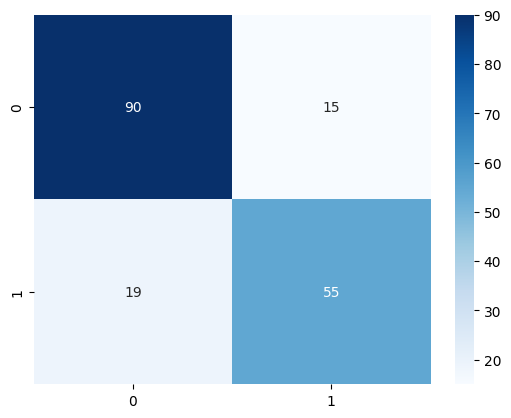

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [55]:
new_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': ['male'],
    'Age': [22],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': ['S'],
    'FamilySize': [1],
    'Title': ['Mr']
})

In [56]:
new_passenger['Sex'] = le_sex.fit_transform(new_passenger['Sex'])
new_passenger['Embarked'] = le_embarked.fit_transform(new_passenger['Embarked'])

rare_title = df['Title'].value_counts()[df['Title'].value_counts() <10].index
new_passenger['Title'] = new_passenger['Title'].replace(rare_title, 'other')
new_passenger['Title'] = le_title.fit_transform(new_passenger['Title'])

new_passenger[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(new_passenger[['Age', 'Fare', 'FamilySize']])

In [57]:
prediction = model.predict(new_passenger)
print("Survived" if prediction[0] == 1 else "Did not survive")

Survived
